# Pytrends, Google Trends API
- https://pypi.org/project/pytrends/
- https://github.com/GeneralMills/pytrends
- Interest Over Time : returns historical, indexed data for when the keyword was searched most as shown on Google Trend's Interest Over Time section.
- Historical Hourly Interest : returns historical, indexed, hourly data for when the keyword was searched most as shown on Google Trends' Interest Over Time section. It sends multiple requests to Google, each retrieving one week of hourly data. It seems like this would be the only way to get historical, hourly data.
- Interest by Region : returns data for where the keyword is most searched as shown on Google Trend's Interest by Region section.
- Related Topics : returns data for the related keywords to a provided keyword shown on Google Trend's Related Topics section.
- Related Queries : returns data for the related keywords to a provided keyword shown on Google Trends' Related Queries section.
- Trending Searches : returns data for latest trending searches shown on Google Trends' Trending Searches section.
- Top Charts : returns the data for a given topic shown in Google Trends' Top Charts section.
- Suggestions : returns a list of additional suggested keywords that can be used to refine a trend search.

# US Top 10 Actors (Male) Ranking Test

In [10]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib
%matplotlib inline

In [11]:
# API Connection
# 接続言語、タイムゾーンを指定しAPIに接続
pytrends = TrendReq(hl="en-US",tz=360)

In [12]:
# US Top 10 Actors
# Define tag_list
name_list_1 = ["Tom Hanks","Christian Bale","Leonardo DiCaprio","Morgan Freeman"]
name_list_2 = ["Robert De Niro","Anthony Hopkins","Denzel Washington","Robert Downey Jr."]
name_list_3 = ["Johnny Depp","Al Pacino","Daniel Day-Lewis","Kevin Spacey"]

In [13]:
pytrends.build_payload(name_list_1, timeframe='2014-01-01 2019-04-15', geo='US')
df1 = pytrends.interest_over_time()

pytrends.build_payload(name_list_2, timeframe='2014-01-01 2019-04-15', geo='US')
df2 = pytrends.interest_over_time()

pytrends.build_payload(name_list_3, timeframe='2014-01-01 2019-04-15', geo='US')
df3 = pytrends.interest_over_time()

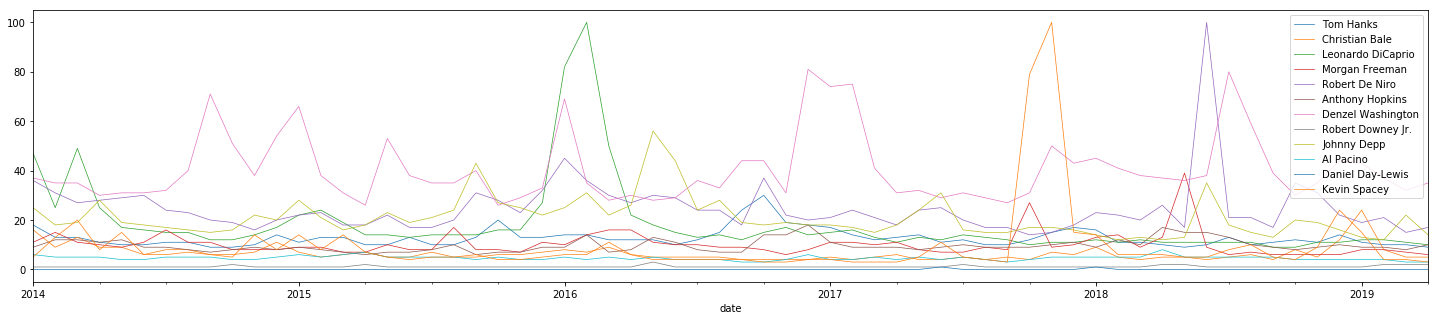

In [22]:
df = pd.concat([df1, df2, df3], axis=1)
df.drop(columns="isPartial",axis=1,inplace=True)
df.plot(figsize=(25, 5), lw=.7)

In [23]:
df.head()

,Tom Hanks,Christian Bale,Leonardo DiCaprio,Morgan Freeman,Robert De Niro,Anthony Hopkins,Denzel Washington,Robert Downey Jr.,Johnny Depp,Al Pacino,Daniel Day-Lewis,Kevin Spacey
date,,,,,,,,,,,,
2014-01-01,18,16,47,11,36,9,37,1,25,6,0,5
2014-02-01,13,9,25,15,31,12,35,1,18,5,0,13
2014-03-01,13,13,49,11,27,12,35,1,19,5,0,20
2014-04-01,11,9,25,10,28,11,30,1,28,5,0,8
2014-05-01,10,9,17,9,29,12,31,1,19,4,0,15


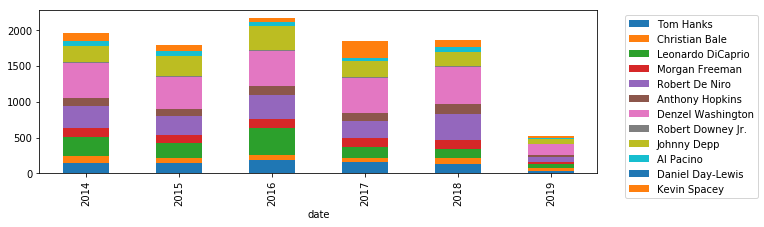

In [24]:
yearly = df.resample('Y').sum().plot.bar(stacked=True, figsize=(10, 3))
plt.xticks(np.arange(6), ('2014', '2015', '2016', '2017', '2018', '2019'))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [25]:
seasonality = pd.DataFrame()
col_lists = df.columns[:-1]

for i in col_lists:
    res = sm.tsa.seasonal_decompose(df[i])
    seasonality = pd.concat([seasonality, res.trend], axis=1)

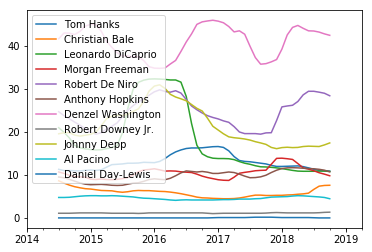

In [26]:
seasonality.plot()

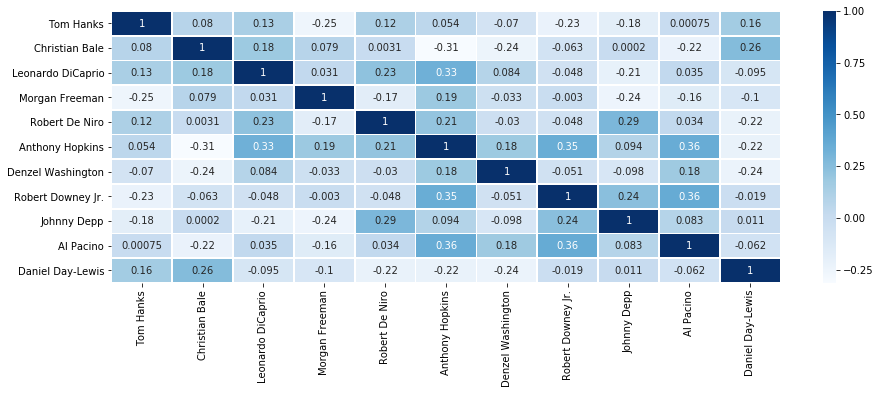

In [27]:
resid = pd.DataFrame()
for i in col_lists:
    res = sm.tsa.seasonal_decompose(df[i])
    resid = pd.concat([resid, res.resid], axis=1)
cor_matrix = resid.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(cor_matrix, annot=True, lw=0.7, cmap='Blues')